In [1]:
from pymongo import MongoClient
import pandas as pd  
import numpy as np 

client = MongoClient('localhost', 27017)
db = client['']

tweets = pd.DataFrame(list(db[''].find()))

In [2]:
data = pd.DataFrame(columns=['Tweets'])
data['Tweets'] = tweets['text']
data['Id'] = tweets['_id']
data['len']  = np.array([len(tweet) for tweet in data['Tweets']])
user = list()
for i in range(0,len(tweets)):
    user.append(tweets['user'][i]['name'])
data['user'] = np.array(user)

In [3]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from nltk.corpus import stopwords
from utils import tokenize_and_stem
 
    
documents = data['Tweets']

myStopWords=set(stopwords.words('italian')
                +stopwords.words('english')+
               list(['abbiat', 'abov', 'anch', 'avess', 'avest', 'avet', 'avev', 'avrebb', 'avrest', 'avret', 
                     'avut', 'becaus', 'befor', 'could', 'doe', 'dure', 'ebb', 'erav', 'facciat', 'facess', 
                     'facest', 'facev', 'farebb', 'farest', 'faret', 'foss', 'fost', 'might', 'must', 'need', 
                     'nostr', 'onc', 'onli', 'ourselv', 'qual', 'quant', 'quell', 'quest', 'sarebb', 'sarest', 
                     'saret', 'siat', 'siet', 'starebb', 'starest', 'staret', 'stavat', 'stess', 'stest', 'stett', 
                     'stiat', 'themselv', 'thi', 'veri', 'vostr', 'would', 'yourselv','becau']))   
    

"""
The most effortless way is by filtering out infrequent words. 
You can achieve this by setting input arguments as follows [1]:

min_df: To ignore terms that have a document frequency lower than the min_df. 
If float, the parameter represents a proportion of documents, integer absolute counts.

max_features: To consider only the top max_features ordered by term frequency across the corpus. 

This is useful if you have strict limit on the size of TF-IDF transformed features.
When dealing with a relatively large corpus, using min_df of 5, 10, or 50 reduces the size of the vocabulary
significantly while maintaining (or often improving) the accuracy.
"""    
    
    
vectorizer = TfidfVectorizer(stop_words=myStopWords, 
                             use_idf=True, 
                             tokenizer=tokenize_and_stem,
                             ngram_range=(1,5)
                             ,min_df=100, max_features=300)
X = vectorizer.fit_transform(documents)

print(X.shape)

true_k = 10
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster :", i),
    lista = [terms[ind] for ind in order_centroids[i, :5]]
    print(lista)

(27959, 194)
Top terms per cluster:
Cluster : 0
['casa', 'http', 'torna', 'dopo', 'finalment']
Cluster : 1
['http', 'http http', 'zaniolo', 'florenzi', 'giorni']
Cluster : 2
['anni', 'fatto', 'http', 'oggi', 'auguri']
Cluster : 3
['zaniolo', 'asroma', 'http', 'asroma http', 'http asroma']
Cluster : 4
['follow', 'unfollow', 'stat', 'follow unfollow', 'today']
Cluster : 5
['http', 'grazi', 'roma', 'iamcallo', 'oggi']
Cluster : 6
['asroma', 'asroma http', 'http', 'http asroma', 'romaporto']
Cluster : 7
['bella', 'http', 'grazi', 'roma', 'vita']
Cluster : 8
['vieribobo', 'http', 'back', 'bomber', 'great']
Cluster : 9
['dopo', 'http', 'anni', 'aver', 'prima']


Counter({5: 19093, 1: 6579, 6: 626, 2: 460, 9: 315, 4: 227, 0: 197, 7: 184, 8: 163, 3: 115})
Silouette_score:  0.2576265767780836


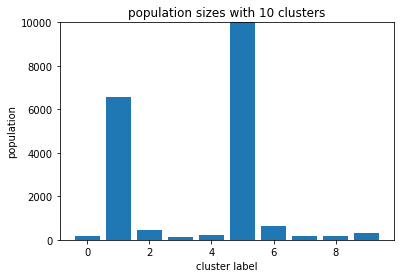

In [5]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import collections


plt.bar(range(len(set(model.labels_))), np.bincount(model.labels_))

plt.ylabel('population')
plt.xlabel('cluster label')
plt.title('population sizes with {} clusters'.format(true_k));

# truncate y axis to see the rest better
plt.ylim(0,10000);


print (collections.Counter(model.labels_))
print ('Silouette_score: ',silhouette_score(X, model.labels_))
